The quantitative introduction workshops

# Workshop 4

If you have attended (physically or virtually) at least one of the first three workshops, and you haven't responded to the [halfway evaluation survey](https://docs.google.com/forms/d/1o0_lrqVGSpMt_0Wk3u0iCGnaQ2IFdKzjbN28COI8bf4/edit) yet, then please do it now - it would be a great help for me. The survey should take less than 5 minutes.

This workshop will be a bit more abstract and conceptual than the previous workshops. This means that you and your group will probably spend more time than in the last workshops simply understanding the introduced concepts and ways of thinking compared to the time you spend on the exercises. You will learn about the concept of sampling distributions and the derived concept of standard errors.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import seaborn as sb
import matplotlib.pyplot as plt
pd.set_option('precision', 2)
%precision 2

'%.2f'

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/AsgerAndersen/basecamp_stats_intro/master/origin_mobility.csv')

# Introduction

Imagine that instead of collecting data from all 712 commuting zones in the US, the researchers behind [American geography of opportunity reveals European origins](https://www.pnas.org/content/116/13/6045) had only been able to collect data from 20 randomly selected commuting zones, because the data collection process was very costly and they therefore did not have resources to survey all the zones. I have simulated this situation by randomly sampling 20 observations from the full dataset. The red dots in the plot below display the values of the *mobility* and *german* variables for these 20 observations. The blue dots display these values for the rest of the dataset.

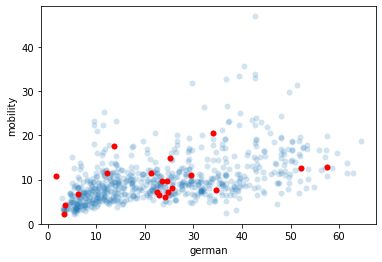

In [4]:
data_sample = data.sample(n=20,random_state=2238)
f_sample, axes_sample = plt.subplots(1,1,figsize=(6,4))
sb.scatterplot('german','mobility',data=data,alpha=0.2,linewidth=0,ax=axes_sample)
sb.scatterplot('german','mobility',data=data_sample,color='red',linewidth=0,ax=axes_sample);

The linear model found by fitting a linear regression with *mobility* as outcome and *german* as predictor on the full dataset is shown by the blue line in the plot below. The red line displays the model found by fitting the same linear regression on the dataset consisting only the 20 randomly selected commuting zones:

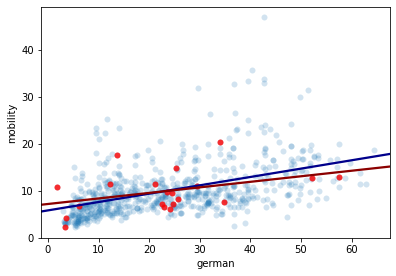

In [14]:
f_reg, axes_reg = plt.subplots(1,1,figsize=(6.25,4.25))
sb.regplot('german','mobility',data=data,ci=None,truncate=False,scatter_kws={'alpha':0.2,'linewidth':0},
           line_kws={'color':'darkblue'},ax=axes_reg)
sb.regplot('german','mobility',data=data_sample,ci=None,truncate=False,scatter_kws={'color':'red','linewidth':0},
           line_kws={'color':'darkred'},ax=axes_reg);

The linear regression model fitted on the full dataset (the blue line) has the function:

<p style="text-align: center;"> $m(g) = 5.82 + 0.18g$ </p>

whereas the linear regression model fitted on the sampled data (the red line) has the function:

<p style="text-align: center;"> $m(g) = 7.18 + 0.12g$ </p>

We see from the plot and the functions that the fitted linear models are similar, but not identical. In particular, we see that the model from the sampled data overestimates the intercept and underestimates the slope compared to the model from the full data. However, if the researchers had only collected data on the randomly sampled commuting zones, they would have no way of knowing this, since they would only be able to fit a linear regression to the sampled data, and the plot would consist of only the red dots and the red line. All, they would be seeing would be this plot:

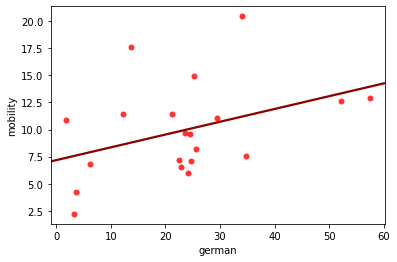

In [15]:
sb.regplot('german','mobility',data=data_sample,ci=None,truncate=False,scatter_kws={'color':'red','linewidth':0},line_kws={'color':'darkred'});

If random chance had handed the researchers a different sample, they would have ended up with a slightly different linear model. The plots below show the linear models resulting from fitting the same linear regression on 9 different random samples of 20 observations from the full dataset. The blue line in the plots are the model from the full dataset.

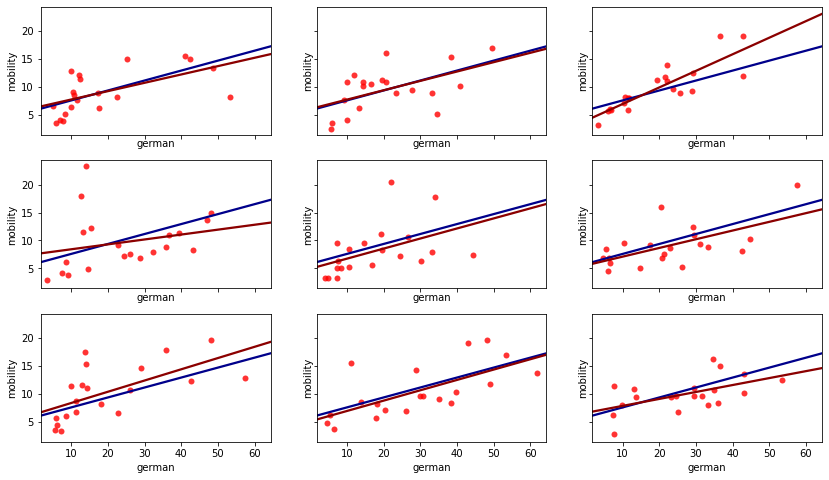

In [16]:
np.random.seed(2331)
data_samples = [data.sample(n=20) for i in range(0,9)]
f_regs, axes_regs = plt.subplots(3,3,figsize=(14,8),sharex=True,sharey=True)
for ax,d in zip(axes_regs.flatten(),data_samples) :
    sb.regplot('german','mobility',data=data,ci=None,scatter=False,
           line_kws={'color':'darkblue'},ax=ax)
    sb.regplot('german','mobility',data=d,ci=None,truncate=False,scatter_kws={'color':'red','linewidth':0},
           line_kws={'color':'darkred'},ax=ax);

We see that the intercepts and slopes of the fitted linear models vary quite a lot dependent on which random sample the model is fitted on. However, we imagined that the researchers had only collected a single random sample. They therefore have no way of knowing, if this particular sample has lead them to under- or overestimate the intercept and slope compared to the unknown linear model from the full dataset. However, statisticians have developed techniques to deal with the uncertainty in a model's estimated parameters that arises from the fact that the data, which the model is fitted on, would be slightly different in another random sample from the same underlying data source. The most standard methods in quantitative social science is to calculate the estimated parameters' standard errors and confidence intervals (using p-values is also popular, but the methodological framework in which they are most commonly used - called null hypothesis significance testing - is [now being discouraged by the American Statiscal Association](https://www.tandfonline.com/doi/full/10.1080/00031305.2019.1583913)). The aim of this workshop is to teach you the principles behind these statistical constructions.

# Populations and samples

In quantitative social science we often like to think of our data as a random sample from a larger population that we would like to study. It is often useful to distinguish between *target population* and *sampled population*. 

The *target population* is the set of units that the researchers want to study. This could e.g. be school aged individuals in a study of the relationship between school and home environments. The *sampled population* is the set units that the researchers have in fact drawn a random sample from. This could e.g. be school aged individuals, who attend public schools in Copenhagen. The *target population* and the *sampled population* are ideally the same, but practical constraints, unawareness of important mechanisms in the sampling procedure or plain sloppiness may lead them to be different. This can lead the researchers to make unaccurate claims about the *target population*, because they are studying a sample that is unrepresentative of this population. However, this is not the kind of problem we are concerned with in this workshop.

In this workshop, we are merely interested in using our sampled data to draw conclusions about the *sampled population*. More specifically, we want to fit a linear regression model on our sampled data. We call the resulting fitted parameter values the model's *estimated parameters*. We call the parameter values that would result from fitting the same linear regression model on the entire *sampled population* for the model's *population parameters*. We don't know the data on the full *sampled population*, but only the data on our actual sample. Therefore, we only know a model's *estimated parameters*, but not its *population parameters*. We are interested in how accurately the *estimated parameters* reflect the *population parameters*. 

As we have seen in the introduction, the randomness of the sample means that the *estimated parameters* from one sample is slighty different from the *estimated parameters* from other samples. Often the *estimated parameters* are close to *population parameters*, but sometimes - if we get an unlucky sample - they can also be quite different from them. The problem is that we can only observe our sample and not the sampled population, and therefore we have no way of knowing, if we have got an unlucky sample. 

What we can know are general properties like: The larger our sample is, the more unlikely it is that our model's *estimated parameters* are very different from its *population parameters*. In general, we can reason about what is called an estimated parameter's *sampling distribution*, which is the distribution of the estimated parameter that would result from randomly redrawing our data sample again and again and refitting the model on all these samples. A sampling distribution is a hard concept to understand, but in the rest of this workshop we will give it a try.

**Exercise 4.1:** Discuss the difference between a *target population* and a *sampled population*.

**Answer 4.1:**

**Exercise 4.2:** Discuss the difference between a linear regression model's *estimated parameters* and *population parameters*.

**Answer 4.2:**

# Sampling Distributions

## An imagined example

Let us imagine the following process. The researchers from the example in the introduction collect 1000 random samples, which each consists of 20 out of the 712 commuting zones. They then fit a linear regression with mobility as outcome and german as predictor to each of the samples. They store the model's estimated parameters for each of the samples in a dataframe. To be clear: It would not make sense to follow this kind of process in actual research, but it is nevertheless a good conceptual approach to understanding sampling distributions. I have simulated the process below and shown the first five rows of the resulting dataframe.

In [17]:
np.random.seed(1512)
data_samples = [data.sample(n=20) for i in range(0,1000)]
models = [sm.ols('mobility~german',d).fit() for d in data_samples]
fitted_pars = pd.DataFrame({'sample_id':range(1,1001)})
fitted_pars['intercept'] = [m.params[0] for m in models]
fitted_pars['slope'] = [m.params[1] for m in models]
fitted_pars.round(2).head()

,sample_id,intercept,slope
0,1,3.49,0.37
1,2,6.78,0.21
2,3,4.91,0.25
3,4,5.78,0.22
4,5,1.69,0.32


The plots below show the distributions of the estimated parameters resulting from the process described and simulated above. Each dot in the left plot shows the linear regression model's estimated intercept and slope from a particular of the 1000 samples. The black dot displays the model's population intercept and slope. Likewise, the dashed black lines in the middle and right plot are the model's population intercept (middle plot) and slope (right plot).

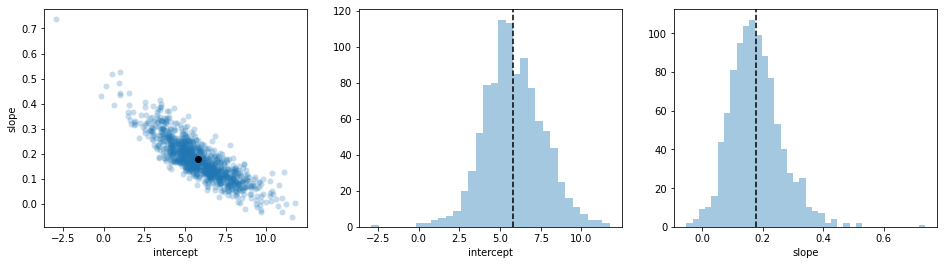

In [18]:
model_fulldata = sm.ols('mobility~german',data=data).fit()
samp_dist_fig, samp_dist_axes = plt.subplots(1,3,figsize=(16,4))
sb.scatterplot('intercept','slope',data=fitted_pars,ax=samp_dist_axes[0],linewidth=0,alpha=0.25)
sb.distplot(fitted_pars['intercept'],kde=False,ax=samp_dist_axes[1])
sb.distplot(fitted_pars['slope'],kde=False,ax=samp_dist_axes[2])
samp_dist_axes[0].scatter(model_fulldata.params[0],model_fulldata.params[1],color='black')
samp_dist_axes[1].axvline(model_fulldata.params[0],color='black',linestyle='--')
samp_dist_axes[2].axvline(model_fulldata.params[1],color='black',linestyle='--');

**Exercise 4.3:** How would you interpret the fact that the distributions of the model's estimated parameters are concentrated around the model's population parameters? Do you think that this property should make the researchers more or less willing to use the estimated parameters from a single random sample of 20 commuting zones to say something about the model's population parameters? (The researcher would do this, if he/she only had the resources to survey 20 randomly sampled commuting zones, but still decided to go ahead with the research and afterwards claimed to be able to say something about all the commuting zones.)

**Answer 4.3:**

**Exercise 4.4:** For each of the red dots in the left plot below, discuss what sample of 20 commuting zones could have resulted in these estimated parameters. You can use the scatterplot of the *mobility* and *german* variable for the entire 712 commuting zones to facilitate the discussion (the plot to the right below).

**Answer 4.4:**

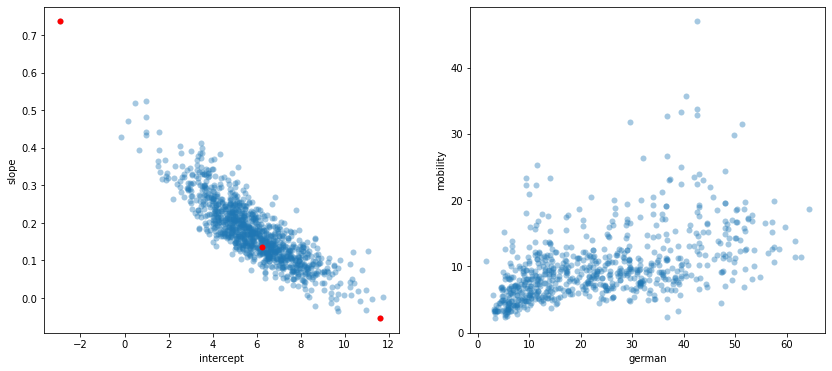

In [19]:
chosen_fitted_pars = fitted_pars[fitted_pars['slope'].isin(
    [fitted_pars['slope'].min(),
     fitted_pars['slope'].quantile([1/3],interpolation='nearest'),
     fitted_pars['slope'].max()])]
f_find_sample, axes_find_sample = plt.subplots(1,2,figsize=(14,6))
sb.scatterplot('intercept','slope',data=fitted_pars,ax=axes_find_sample[0],linewidth=0,alpha=0.4)
sb.scatterplot('intercept','slope',data=chosen_fitted_pars,ax=axes_find_sample[0],color='red',linewidth=0)
sb.scatterplot('german','mobility',data=data,alpha=0.4,linewidth=0,ax=axes_find_sample[1]);

Imagine now that the researchers had collected random samples of 60 commuting zones instead of 20 commuting zones, but otherwise followed the same process as the one described above. I have simulated this and plotted the resulting distributions of the estimated parameters. The plots on the top row are the distributions, when the researchers collected samples of 20 commuting zones (they are identical to the plots above). The plots on the bottom row are the distributions, when the researchers collected samples of 60 commuting zones.

In [20]:
np.random.seed(1156)
data_samples_50 = [data.sample(n=60) for i in range(0,1000)]
models_50 = [sm.ols('mobility~german',d).fit() for d in data_samples_50]
fitted_pars_50 = pd.DataFrame({'sample_id':range(1,1001)})
fitted_pars_50['intercept'] = [m.params[0] for m in models_50]
fitted_pars_50['slope'] = [m.params[1] for m in models_50]

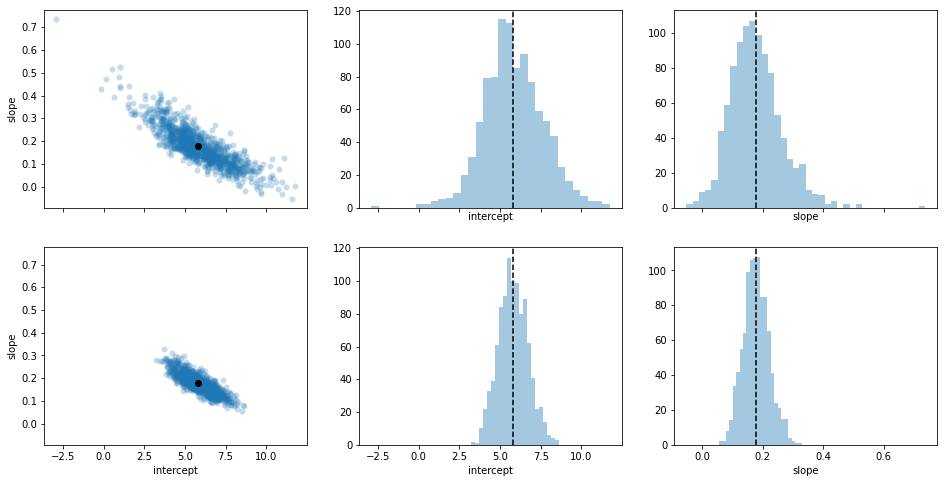

In [21]:
samp_comp_fig, samp_comp_axes = plt.subplots(2,3,figsize=(16,8),sharex='col',sharey='col')
sb.scatterplot('intercept','slope',data=fitted_pars,ax=samp_comp_axes[0,0],linewidth=0,alpha=0.25)
sb.distplot(fitted_pars['intercept'],kde=False,ax=samp_comp_axes[0,1])
sb.distplot(fitted_pars['slope'],kde=False,ax=samp_comp_axes[0,2])
samp_comp_axes[0,0].scatter(model_fulldata.params[0],model_fulldata.params[1],color='black')
samp_comp_axes[0,1].axvline(model_fulldata.params[0],color='black',linestyle='--')
samp_comp_axes[0,2].axvline(model_fulldata.params[1],color='black',linestyle='--')
sb.scatterplot('intercept','slope',data=fitted_pars_50,ax=samp_comp_axes[1,0],linewidth=0,alpha=0.25)
sb.distplot(fitted_pars_50['intercept'],kde=False,ax=samp_comp_axes[1,1])
sb.distplot(fitted_pars_50['slope'],kde=False,ax=samp_comp_axes[1,2])
samp_comp_axes[1,0].scatter(model_fulldata.params[0],model_fulldata.params[1],color='black')
samp_comp_axes[1,1].axvline(model_fulldata.params[0],color='black',linestyle='--')
samp_comp_axes[1,2].axvline(model_fulldata.params[1],color='black',linestyle='--');

**Exercise 4.5:** We see that the distributions of the model's estimated parameters are more concentrated around the model's population parameters, when the researchers collect samples of 60 instead of 20 commuting zones. How would you explain this? Do you think that this should make a researcher more or less willing to use the estimated parameters from a single random sample of 60 commuting zones to say something about the population parameters compared to the estimated parameters from a single random sample of 20 commuting zones?

**Answer 4.5:**

## More abstractly

One way to abstractly conceptualize the sampling distribution of an estimated parameter is to think of it as the distribution that would result from using the same sampling procedure to resample the data and refit the model an infinite number of times. The sampling distribution is not something that we can observe in the real world. Rather, it is an abstract mental construction that we use to think about the uncertainty in the estimated parameter that results from the fact that the data, which our model is fitted on, is only a sample of the entire sampled population. The sampling distribution is a confusing concept, so don't worry if you find it difficult to understand. [This video](https://www.youtube.com/watch?v=Zbw-YvELsaM) provides some of the same intuition behind the concept that I have tried to provide in the examples above, but maybe you will find the video more clear, so please watch it if you have found today's workshop confusing, so far.

**Exercise 4.6:** With your current understanding of sampling distributions, can you think of any reasons why this concept could be useful for reasoning about the uncertainty in a model's estimated parameters that results from the uncertainty in fitting your model on a sample instead of on the entire sampled population? How do you think that sampling distributions could be useful for thinking about the relation between an estimated parameter from a specific sample and the corresponding population parameter?

**Answer 4.6:**

Researchers can never observe the sampling distribution, since they only have the sample they in fact collected. However, they can still reason about properties of the sampling distribution, because they know - or can choose to assume - basic properties about how they sampled their data, and they can choose to assume properties about the sampled population. For instance, they know the number of observations in their sample.

**Exercise 4.7:** How do you think that the number of observations in a sample affects the sampling distributions of estimated parameters from models that are fitted on the sample? Does it increase or decrease the dispersion of the sampling distribution?

**Answer 4.7:**

## Standard Errors

The standard error of an estimated parameter is defined as the standard deviation of its sampling distribution.

**Exercise 4.8:** Why would you say that the standard error of a parameter could be a reasonable measure of the uncertainty that results from the fact that the model is fitted on a sample and not the full dataset? *Hint:* Remember from the first workshop that the standard deviation is a measure of dispersion. How is uncertainty related to the dispersion of the sampling distribution?

**Answer 4.8:**

**Exercise 4.9:** How do you think that the standard errors of a linear regression model's parameters are related to the number of observations in the sample, which the model is fitted on? Does the number of observations increase or decrease the parameters' standard errors? *Hint:* This exercise is very closely related to exercise 4.5 and 4.7.

**Answer 4.9:**

**Exercise 4.10:** How do you think that the standard errors of a linear regression model's parameters are related to the variance of the model's outcome variable? Does a larger variance of the outcome variable increase or decrease the parameter's standard errors?

**Anser 4.10:**

The standard errors of a linear regression model's parameters are not only determined by the number of observations in the sample and the variance of the model's outcome variable. The variance of the predictor variables and the covariances between each pair of predictor variables also matter. If you are interested in how these quantities matter for the parameters' standard error, then feel free to ask me or try to google it. Otherwise, it is fine just to think of the parameters' standard errors as being determined by some rather complicated function of the number of samples, the variance of the outcome variable, the variances of the predictors and the covariances between the predictors.

Since researchers cannot observe sampling distributions, they also cannot observe quantities defined via sampling distributions. Therefore, they cannot observe standard errors. However, reseachers can try to estimate the shape of sampling distributions and thus estimate related quantities, such as standard errors.

## Estimating sampling distributions

Researchers only observe the sample they have in fact collected. They therefore only have this sample to rely on, if they want to estimate the shape of the sampling distribution of a parameter. However, we said that the sampling distribution was the distribution that would arise, if the researchers resampled the data and reestimated the parameter an infinite number of times. How can this distribution be estimated from a single sample?

### Bootstrapping

Bootstrapping is a method for estimating sampling distributions. I am only going to explain the basic intuition behind the method and how to perform it in its most basic version. If you are interested in knowing more about the precise assumptions behind the many different versions of bootstrapping, there are lots of open high quality articles and videos, but it quickly gets quite mathematical.

The basic intuition behind bootstrapping is that the sample we have in fact collected is our best available estimate of the dataset that would arise from collecting data on all units in the sampled population. If we want to know what would happen if we resampled the sample an infinite number of times, our best available approach is therefore to simulate this process by resampling the sample from itself a lot of times and fitting a model on each of these so-called bootstrap samples. 

More concretely, consider our example from the earlier in this workshop, where the researchers had only had the resources to collect data from a random sample of 20 commuting zones. They have fitted a linear regression model. The plot below shows the data sample and the model.

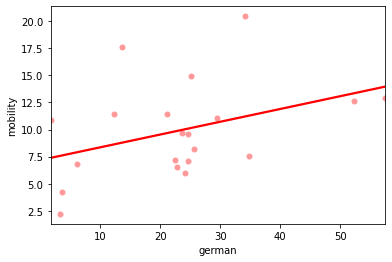

In [22]:
sb.regplot('german','mobility',data=data_sample,color='red',ci=False,scatter_kws={'alpha':0.4,'linewidth':0});

Now, the researchers would like to estimate the sampling distribution of the intercept and slope parameters of their model, because they would like to estimate the parameters' standard errors. They decide to do this by bootstrapping. A single bootstrap sample can be constructed by randomly drawing 20 observations from their actual sample. The reason that this does not just reproduce the exact same sample is that the observations are randomly drawn *with replacement*, meaning that when one observation has been randomly drawn, it is put back in pool of possible draws, before a new observation is randomly drawn. [This video](https://www.youtube.com/watch?v=tTZybQTE0dw) describes this process of making a single bootstrap sample. Now that the researchers have a single bootstrap sample, they can fit the same linear regression model on this sample. The plot below shows the fitted model on the actual sample (to the left) and the bootstrap sample (to the right).

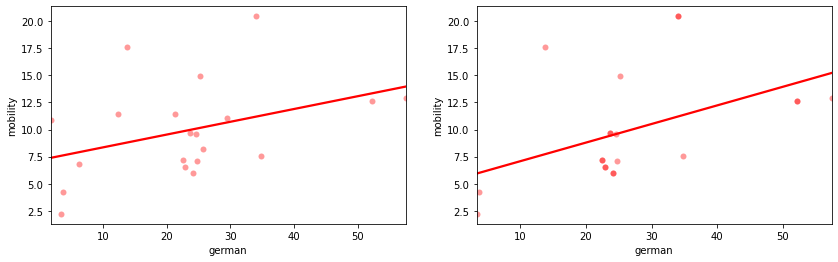

In [23]:
boot_sample = data_sample.sample(n=20,replace=True,random_state=1210)
boot_fig, boot_axes = plt.subplots(1,2,figsize=(14,4))
sb.regplot('german','mobility',data=data_sample,color='red',ci=False,
           scatter_kws={'alpha':0.4,'linewidth':0},ax=boot_axes[0]);
sb.regplot('german','mobility',data=boot_sample,color='red',ci=False,
           scatter_kws={'alpha':0.4,'linewidth':0},ax=boot_axes[1]);

The researchers now repeat this process a lot of times, say e.g. 1000 (if you want to know what a lot means in different use-cases, you will have to consult the bootstrapping literature). They collect the estimated parameters from the bootstrap samples in a dataframe. I have simulated this process below.

In [24]:
np.random.seed(1216)
boot_samples = [data_sample.sample(n=20,replace=True) for i in range(0,1000)]
boot_params = [sm.ols('mobility~german',data=boot).fit().params for boot in boot_samples]
boot_params = pd.DataFrame(boot_params)
boot_params.head()

,Intercept,german
0,5.93,0.20
1,6.98,0.09
2,7.34,0.11
3,10.68,0.04
4,9.26,0.05


Now they can estimate the shape of the sampling distribution of their linear regression model's parameters by plotting the histograms of the estimated parameters from the bootstrap samples. These histograms are shown below. The dashed lines in the histograms are the estimated parameter values of $\beta_0$ (the intercept) and $\beta_1$ (the slope) - that is: the parameter values when the model was estimated on the actual sample, not on any of the bootstrap samples.

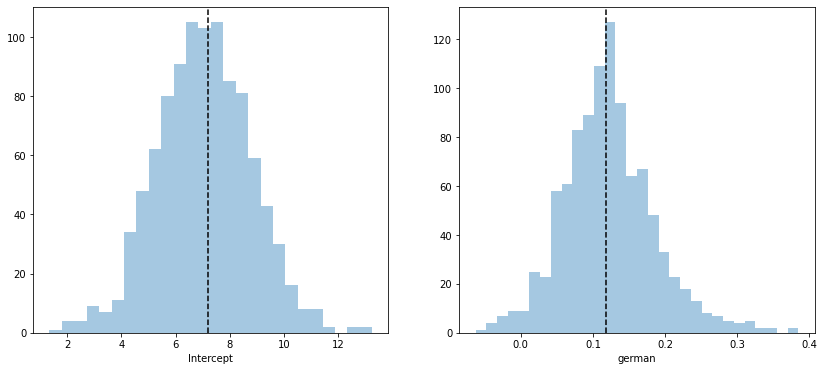

In [25]:
mob_ger = sm.ols('mobility~german',data=data_sample).fit()
boot_sampdist_fig, boot_sampdist_axes = plt.subplots(1,2,figsize=(14,6))
sb.distplot(boot_params['Intercept'],kde=False,ax=boot_sampdist_axes[0])
sb.distplot(boot_params['german'],kde=False,ax=boot_sampdist_axes[1])
boot_sampdist_axes[0].axvline(mob_ger.params[0],color='black',linestyle='--')
boot_sampdist_axes[1].axvline(mob_ger.params[1],color='black',linestyle='--');

The researchers can now estimate the standard errors of their model's parameters by simply calculating the standard deviation of the estimated parameters from the bootstrap samples.

In [26]:
se_int = boot_params['Intercept'].std()
se_german = boot_params['german'].std()
print('Estimated Standard Error of Intercept: {} \nEstimated Standard Error of Slope: {}'.format(np.round(se_int,2),np.round(se_german,2)))

Estimated Standard Error of Intercept: 1.73 
Estimated Standard Error of Slope: 0.06


Note that the bootstrapping process is very similar to the process I asked you to imagine above, where the researchers are collecting new samples again and again. The difference is that with the bootstrapping method the researchers are not actually going out to collect more samples, but instead they are using their own single sample to simulate this process.

**Exercise 4.11:** Discuss the bootstrapping method. Do you understand how it is performed? Do you understand what it is trying to accomplish? Do you think that it makes sense?

**Answer 4.11:**

**Exercise 4.12:** Try to write down the steps of using bootstrapping to estimate the standard error of a slope parameter from a linear regression model.

**Answer 4.12:**

Let us try to repeat the example above, where we imagine that the researchers randomly sample 60 instead of 20 commuting zones:

In [27]:
np.random.seed(1216)
data_sample_60 = data.sample(n=60)
boot_samples_60 = [data_sample_60.sample(n=60,replace=True) for i in range(0,1000)]
boot_params_60 = [sm.ols('mobility~german',data=boot).fit().params for boot in boot_samples]
boot_params_60 = pd.DataFrame(boot_params)
boot_params_60.head()

,Intercept,german
0,5.93,0.20
1,6.98,0.09
2,7.34,0.11
3,10.68,0.04
4,9.26,0.05


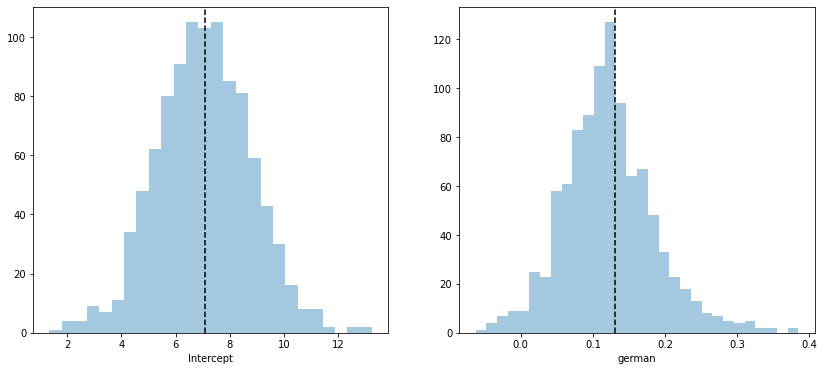

In [28]:
mob_ger = sm.ols('mobility~german',data=data_sample_60).fit()
boot_sampdist_60_fig, boot_sampdist_60_axes = plt.subplots(1,2,figsize=(14,6))
sb.distplot(boot_params_60['Intercept'],kde=False,ax=boot_sampdist_60_axes[0])
sb.distplot(boot_params_60['german'],kde=False,ax=boot_sampdist_60_axes[1])
boot_sampdist_60_axes[0].axvline(mob_ger.params[0],color='black',linestyle='--')
boot_sampdist_60_axes[1].axvline(mob_ger.params[1],color='black',linestyle='--');

In [29]:
se_int = boot_params_60['Intercept'].std()
se_german = boot_params_60['german'].std()
print('Estimated Standard Error of Intercept: {} \nEstimated Standard Error of Slope: {}'.format(np.round(se_int,2),np.round(se_german,2)))

Estimated Standard Error of Intercept: 1.73 
Estimated Standard Error of Slope: 0.06


We see that the estimated standard error of the slope and the intercept have decreased compared to the example where the researchers only randomly 20 commuting zones. This makes sense, because a larger sample should make the researchers more certain that their estimated parameter values are not too far away from the population parameter values.

### Central Limit Theorem

Another way to estimate sampling distributions is to use the *central limit theorem* (CLT), which is a very foundational and important statistical theorem. I am not going to explain what CLT is about and how it is used to calculate sampling distributions, but there are lots of videos about it (e.g. [this](https://www.youtube.com/watch?v=YAlJCEDH2uY)), if you are interested in trying to understand it. Using CLT-based methods is more widespread in applied social science research compared to using bootstrapping methods. However, bootstrapping methods are more useful for understanding the concept of estimating a sampling distribution, and they also generalize to a wider range of modelling applications (such as many machine learning models). This is the reason you have been taught about the basic intution behind bootstrapping instead of CLT.

# Extra

**Extra exercise:** Try to experiment with using bootstrapping to estimate sampling distributions and standard errors of a linear regression model's parameters on [a dataset from the sklearn library](https://scikit-learn.org/stable/datasets/). You can use the code below, but you should fit a linear regression model of your choice on the dataset, you have chosen, instead of fitting the model with mobility as outcome and german as predictor.

In [ ]:
np.random.seed(1216)
boot_samples = [data_sample.sample(n=20,replace=True) for i in range(0,1000)]
boot_params = [sm.ols('mobility~german',data=boot).fit().params for boot in boot_samples]
boot_params = pd.DataFrame(boot_params)
boot_params.head()

In [ ]:
mob_ger = sm.ols('mobility~german',data=data_sample).fit()
boot_sampdist_fig, boot_sampdist_axes = plt.subplots(1,2,figsize=(14,6))
sb.distplot(boot_params['Intercept'],kde=False,ax=boot_sampdist_axes[0])
sb.distplot(boot_params['german'],kde=False,ax=boot_sampdist_axes[1])
boot_sampdist_axes[0].axvline(mob_ger.params[0],color='black',linestyle='--')
boot_sampdist_axes[1].axvline(mob_ger.params[1],color='black',linestyle='--');

In [ ]:
se_int = boot_params['Intercept'].std()
se_german = boot_params['german'].std()
print('Estimated Standard Error of Intercept: {} \nEstimated Standard Error of Slope: {}'.format(np.round(se_int,2),np.round(se_german,2)))

Below I load two of the datasets from the sklearn library.

In [30]:
#The code below shows how to load two datasets, one about housing prices in Boston and the other about wine.

#You can choose to work with one of these datasets or see if you find another dataset from the sklearn library more 
#interesting

#All the datasets from sklearn (including the housing prices and wine data) 
#are described on https://scikit-learn.org/stable/datasets/).

from sklearn.datasets import load_boston, load_wine
boston = load_boston()
prices = boston['target']
boston = pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston['PRIC'] = prices
wine = load_wine()
wine_types = wine['target']
wine = pd.DataFrame(wine['data'],columns=wine['feature_names'])
wine['wine_type'] = wine_types

In [31]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRIC
0,6.32e-03,18.0,2.31,0.0,0.54,6.58,65.2,4.09,1.0,296.0,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0.0,0.47,6.42,78.9,4.97,2.0,242.0,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0.0,0.47,7.18,61.1,4.97,2.0,242.0,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0.0,0.46,7.00,45.8,6.06,3.0,222.0,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0.0,0.46,7.15,54.2,6.06,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
